<a href="https://colab.research.google.com/github/Balajivasudevan03/2nd_repository/blob/main/netflix_project!!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df["title"].isna().sum()

0

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.shape

(8807, 12)

#Data prepartion for "cast" column!!

In [8]:
cast_df=pd.DataFrame(df["cast"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
cast_df=cast_df.stack().reset_index()
cast_df.drop("level_1",axis=1,inplace=True)
cast_df.rename(columns={0:"cast"},inplace=True)
cast_df

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


#Data prepartion for "director" column!!

In [9]:
director_df=pd.DataFrame(df["director"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
director_df=director_df.stack().reset_index()
director_df.drop("level_1",axis=1,inplace=True)
director_df.rename(columns={0:"director"},inplace=True)
director_df

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


#Data preparation for "country" column!!

In [10]:
country_df=pd.DataFrame(df["country"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
country_df=country_df.stack().reset_index()
country_df.drop("level_1",axis=1,inplace=True)
country_df.rename(columns={0:"country"},inplace=True)
country_df

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


#Data preparation for "listed_in" column!!

In [11]:
listed_in_df=pd.DataFrame(df["listed_in"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
listed_in_df=listed_in_df.stack().reset_index()
listed_in_df.drop("level_1",axis=1,inplace=True)
listed_in_df.rename(columns={0:"listed_in"},inplace=True)
listed_in_df

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


#Creating the new data-frame out, from the preprocessed columns and naming it as "New_df"!!!

In [12]:
New_df=director_df.merge(cast_df,on="title",how="inner")

In [13]:
New_df=New_df.merge(country_df,on="title",how="inner")

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
New_df=df[["show_id","type","title"]].merge(New_df,on="title",how="inner")

In [16]:
New_df=New_df.merge(df[['title','date_added','release_year', 'rating', 'duration']],on="title",how="inner")

In [17]:
New_df=New_df.merge(listed_in_df,on="title",how="inner")

In [18]:
New_df=New_df.merge(df[["title","description"]],on="title",how="inner")

In [74]:
New_df.shape

(202065, 12)

#Replacing the missing values in respective columns!!("nan")

In [19]:
New_df["director"].replace(["nan"],["unknown director"],inplace=True)
New_df["cast"].replace(["nan"],["unknown actor"],inplace=True)
New_df["country"].replace(["nan"],["unknown country"],inplace=True)

#Filling the countionous missing values in the respective columns!!("NaN")

In [20]:
New_df["date_added"].fillna(0,inplace=True)
New_df["rating"].fillna(0,inplace=True)
New_df["duration"].fillna(0,inplace=True)

# 1. How has the number of movies released per year changed over the last 20-30 years?(analysis done for last 3-decades or 30-years)

In [21]:
# splitting the data frame into two!!!(TV_show and Movie)
Movie_df=New_df.loc[New_df["type"]=="Movie"]
TV_Show_df = New_df.loc[New_df["type"]=="TV Show"]

In [22]:
filtered=Movie_df.loc[Movie_df["release_year"].apply(lambda x:  x >= 1991)]
filtered=filtered.groupby("release_year")["title"].nunique().sort_values(ascending = False).reset_index()
filtered.rename(columns={"title":"count_of_movies_released"},inplace=True)
filtered.head(20)

,release_year,count_of_movies_released
0,2018,767
1,2017,767
2,2016,658
3,2019,633
4,2020,517
5,2015,398
6,2021,277
7,2014,264
8,2013,225
9,2012,173


# Graphical_representation for question:1....

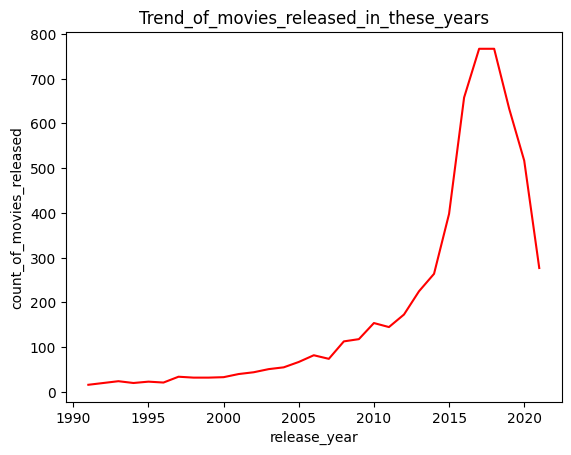

In [23]:
sns.lineplot(x="release_year",y="count_of_movies_released",data=filtered,color="red")
plt.title("Trend_of_movies_released_in_these_years")
plt.show()

# question : 1 -->> insights :     
1) As you can see from the graph, the movies getting released every five year is in increasing trend.

2) There is a steady decrease in movies getting released after 2017 to 2021, as we can infere from the line chart.

3) If you closely observe there is a steady release of movies between 2015 to 2017

# question : 1 --->>> recommendation :     

1. Since the movies getting released is decreaing fashion in recent times, would definetely recommend netflix not to add more movies in the platform.

2. Would definetely recommend netflix to add more TV shows rather adding movies, because that would definetely reduce the budget and also invole lot of TV audience to watch new netflix contents.



# 2. Comparison of tv shows vs. movies!!

In [24]:
Top_20_countries_producing_movies=Movie_df.groupby("country")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Top_20_countries_producing_movies.rename(columns={"title":"Distinct_count_of_movies"},inplace=True)
Top_20_countries_producing_movies

,country,Distinct_count_of_movies
0,United States,2364
1,India,927
2,unknown country,440
3,United States,388
4,United Kingdom,382
5,Canada,187
6,France,155
7,United Kingdom,152
8,France,148
9,Canada,132


# 2. Comparison of tv shows vs. movies!!

In [25]:
Top_20_countries_producing_TV_Shows=TV_Show_df.groupby("country")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Top_20_countries_producing_TV_Shows.rename(columns={"title":"Distinct_count_of_TV_Shows"},inplace=True)
Top_20_countries_producing_TV_Shows

,country,Distinct_count_of_TV_Shows
0,United States,847
1,unknown country,391
2,United Kingdom,246
3,Japan,174
4,South Korea,164
5,United States,91
6,Canada,84
7,India,81
8,Taiwan,70
9,France,64


# graphical representation for question 2!!!





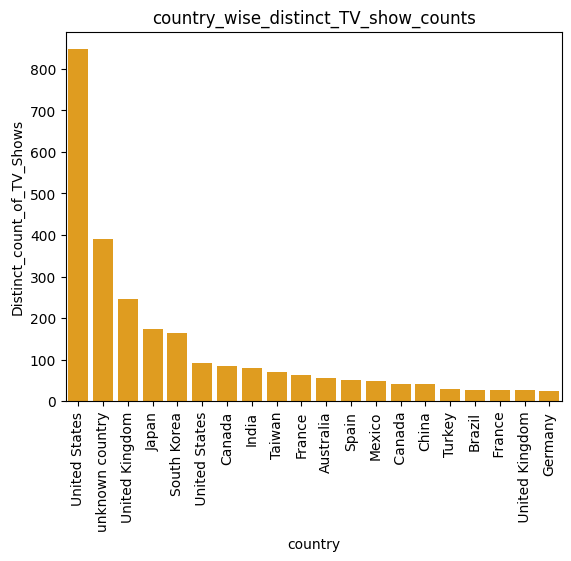

In [26]:
plt.title("country_wise_distinct_TV_show_counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Top_20_countries_producing_TV_Shows ,x="country",y="Distinct_count_of_TV_Shows",estimator=np.sum,color="orange")
plt.show()

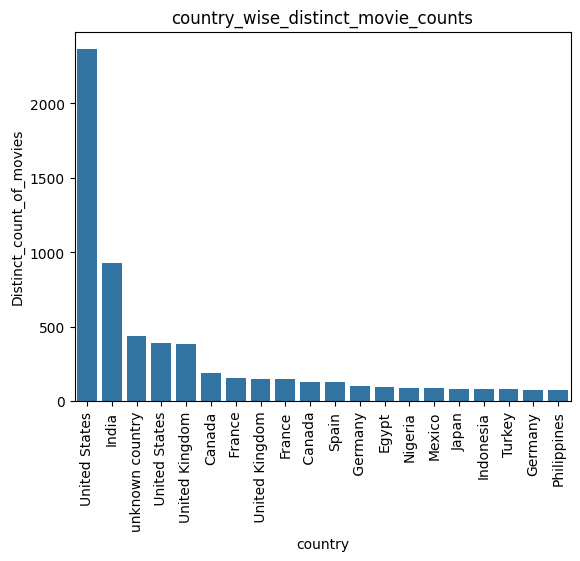

In [27]:
plt.title("country_wise_distinct_movie_counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Top_20_countries_producing_movies,x="country",y="Distinct_count_of_movies",estimator=np.sum)
plt.show()

# Question 2 ---->>> Insights!!!

1. The stand out comparion between the movies count and TV shows count is being dominated by the USA, there is no other country near USA, in producing movies or TV shows, as per this data

2. india and UK is fairly doing good in producing moovies but not the TV shows.

3. UK, japan and south korea are doing better than the other countries in producing TV shows, but way below than the USA.

4. all the other countries are marginally equal in producing the movies and TV shows.



# Question 2 ---->> recomendations!!!

1. Since most of the movies and TV shows are being taken from the USA, it didnt cover up all the other countries movies and TV shows, so to increase the viewvership from all the other countries increase the content from that country in the platform.

2. In specifically in india you can target the movies other than the TV shows, to increase the viewership.

3. In specifically countries like japan, south korea and in UK we can target the TV shows to increase the viewership.

4. According to the countries interest, and local pepole's choice we can add movies or TV show to the platform.




# 3. What is the best time to launch a TV show?

In [28]:
TV_Show_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201938,s8801,TV Show,Zindagi Gulzar Hai,unknown director,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,Romantic TV Shows,"Strong-willed, middle-class Kashaf and carefre..."
201939,s8801,TV Show,Zindagi Gulzar Hai,unknown director,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
202006,s8804,TV Show,Zombie Dumb,unknown director,unknown actor,unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
202007,s8804,TV Show,Zombie Dumb,unknown director,unknown actor,unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [29]:
A=pd.DataFrame(TV_Show_df["date_added"].apply(lambda x: str(x).split(",")).tolist(),index=TV_Show_df["title"]).reset_index()
B=pd.DataFrame(A[0].apply(lambda x: str(x).split(" ")).tolist(),index=A["title"]).reset_index()
C=B.merge(A,on="title",how="inner")
C.drop(columns=[2,"0_y"],inplace=True)
C.rename(columns={"0_x":"month","1_x":"days","1_y":"year"},inplace=True)

In [30]:
C

,title,month,days,year
0,Blood & Water,September,24,2021
1,Blood & Water,September,24,2021
2,Blood & Water,September,24,2021
3,Blood & Water,September,24,2021
4,Blood & Water,September,24,2021
...,...,...,...,...
2729415,Zombie Dumb,July,1,2019
2729416,Zombie Dumb,July,1,2019
2729417,Zombie Dumb,July,1,2019
2729418,Zombie Dumb,July,1,2019


In [31]:
D=C.groupby("month")["title"].nunique().sort_values(ascending=False).reset_index().head(12)
D.rename(columns={"title":"TV_Shows_released_in_a_month"},inplace=True)

In [32]:
D

,month,TV_Shows_released_in_a_month
0,July,254
1,December,250
2,September,246
3,June,232
4,August,230
5,October,210
6,April,209
7,March,205
8,November,199
9,May,187


# Question 3 ----->>> Graphical representation!!!

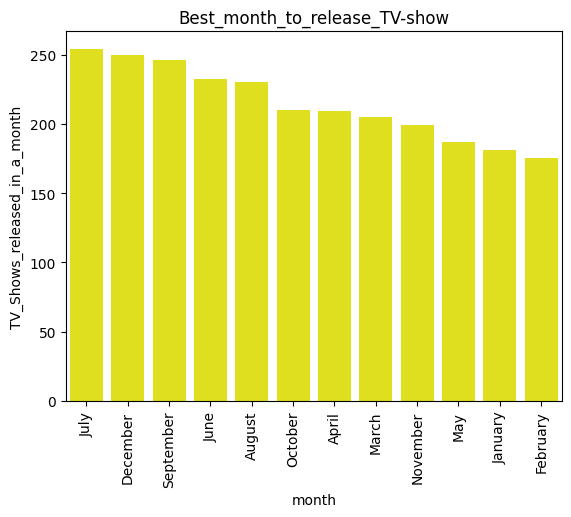

In [33]:
plt.title("Best_month_to_release_TV-show")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=D,x="month",y="TV_Shows_released_in_a_month",color="yellow")
plt.show()

In [34]:
A1=pd.DataFrame(Movie_df["date_added"].apply(lambda x: str(x).split(",")).tolist(),index=Movie_df["title"]).reset_index()
B1=pd.DataFrame(A1[0].apply(lambda x: str(x).split(" ")).tolist(),index=A1["title"]).reset_index()
C1=B1.merge(A1,on="title",how="inner")
C1.drop(columns=["0_y"],inplace=True)
C1.rename(columns={"0_x":"month","1_x":"days","1_y":"year"},inplace=True)
C1

,title,month,days,year
0,Dick Johnson Is Dead,September,25,2021
1,My Little Pony: A New Generation,September,24,2021
2,My Little Pony: A New Generation,September,24,2021
3,My Little Pony: A New Generation,September,24,2021
4,My Little Pony: A New Generation,September,24,2021
...,...,...,...,...
8227638,Zubaan,March,2,2019
8227639,Zubaan,March,2,2019
8227640,Zubaan,March,2,2019
8227641,Zubaan,March,2,2019


In [35]:
D1=C1.groupby("month")["title"].nunique().sort_values(ascending=False).reset_index().head(12)
D1.rename(columns={"title":"movies_released_in_a_month"},inplace=True)

In [36]:
D1

,month,movies_released_in_a_month
0,July,565
1,April,550
2,December,547
3,January,546
4,October,545
5,March,529
6,August,519
7,September,519
8,November,498
9,June,492


# Question 3 ---->>> Graphical representation!!!

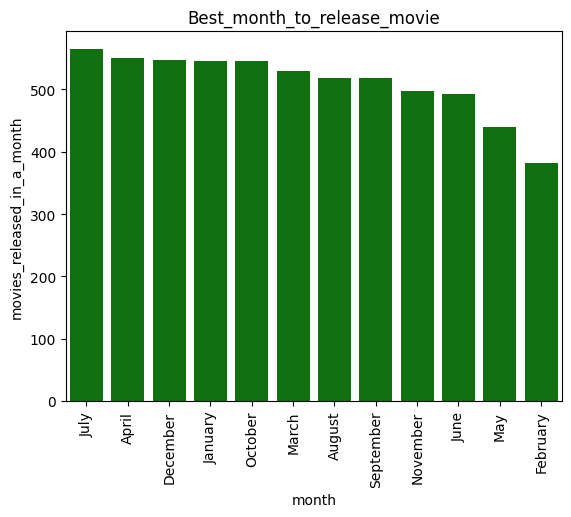

In [37]:
plt.title("Best_month_to_release_movie")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=D1,x="month",y="movies_released_in_a_month",color="green")
plt.show()

# Question 3 --->>> Insights.

1. According to this data, the best month to release a movie or a TV show is on july month.

2. February is the least number of movies/TV shows are getting released.

3. Although there are only a small numnber of chhanges in releasing the movie and TV shows is happening in the platform, so there is no significant month to tell which is the suited month for releasing.

4. But accoding to the data we can tell which month has the median release, high and low release.



# Question 3 ----->>> recommendations.

1. During the summer holidays and winter holiidays releases would help netflix to gain more viewership.

2. Based on the content and which month it suite, release would definitely help netflix to gain more viewership.

3. Releasing more plesant contents during festive sesion would help netflix gain more viewership.



# 4. Analysis of actors/directors of different types of shows/movies!!! (director-analysis)!!!!

In [38]:
Analysis_of_directors_for_TV_shows=TV_Show_df.groupby("director")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Analysis_of_directors_for_TV_shows.rename(columns={"title":"count_of_distinct_director_TV_shows"},inplace=True)

In [39]:
Analysis_of_directors_for_movies=Movie_df.groupby("director")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Analysis_of_directors_for_movies.rename(columns={"title":"count_of_distinct_director_movies"},inplace=True)

In [40]:
Analysis_of_directors_for_TV_shows

,director,count_of_distinct_director_TV_shows
0,unknown director,2446
1,Ken Burns,3
2,Alastair Fothergill,3
3,Gautham Vasudev Menon,2
4,Iginio Straffi,2
5,Joe Berlinger,2
6,Jung-ah Im,2
7,Rob Seidenglanz,2
8,Shin Won-ho,2
9,Stan Lathan,2


In [41]:
Analysis_of_directors_for_movies

,director,count_of_distinct_director_movies
0,unknown director,188
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Suhas Kadav,16
5,Jay Karas,15
6,Marcus Raboy,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Youssef Chahine,12


# Graphical reprresentation for Question no:4:


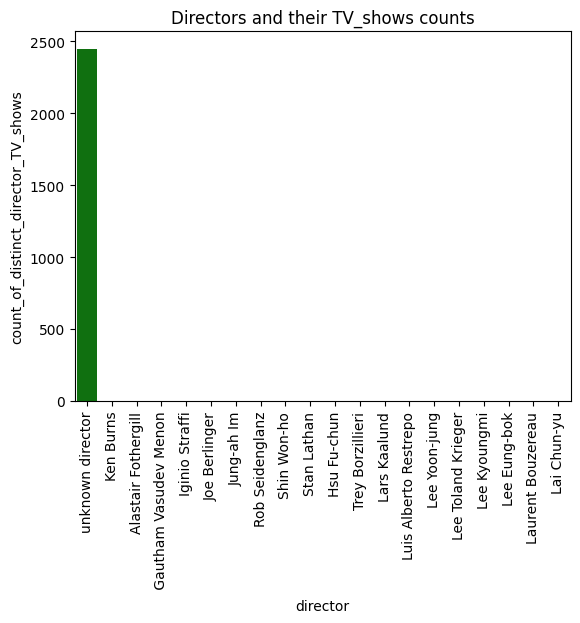

In [49]:
plt.title("Directors and their TV_shows counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Analysis_of_directors_for_TV_shows,x="director",y="count_of_distinct_director_TV_shows",color="green")
plt.show()

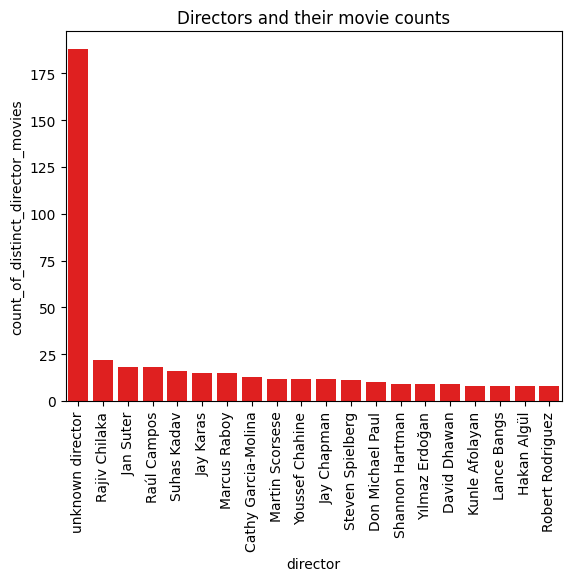

In [48]:
plt.title("Directors and their movie counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Analysis_of_directors_for_movies,x="director",y="count_of_distinct_director_movies",color="red")
plt.show()

# Question 4 ----->>>> insights!!!

1. Directors directing many TV shows are very rare scenario, according to this data.

2. Almost all the directors are equally directing and evenly distributed in the density population of one TV show.

3. Whereas, in the movies plot we derive that directors went on to take so many films.

4. In the movies plot we get that the average films taken by the director is almost to 18.

5. In the movies plot there is no significant difference between the directors and their frequency in taking the films.



# Question 4 --------->>>>> recommendations!!!

1. Since the different movies are being taken by same director, we can say that, netflix should consider few metrics here to add those ditrectors movies into the platform, metrics like ratings, viewership, budget, box-office-collection and all the other metrics.

2. Similarly for TV shows it should be the content and intensity and genres are neede to be consider before adding those to the platform, since we cannot go with the directors metrics for TV shows.



# 5.0  Understanding what content is available in different countries!!!!

In [68]:
movie_content=Movie_df.groupby(["country","listed_in"])["title"].nunique().sort_values(ascending=False).reset_index().head(5)
movie_content.rename(columns={"title":"count_of_different_movie_genres"},inplace=True)
movie_content

,country,listed_in,count_of_different_movie_genres
0,India,International Movies,807
1,United States,Documentaries,429
2,United States,Dramas,429
3,India,Dramas,404
4,United States,Comedies,374


# Graphical representation of Question 5...!!!!

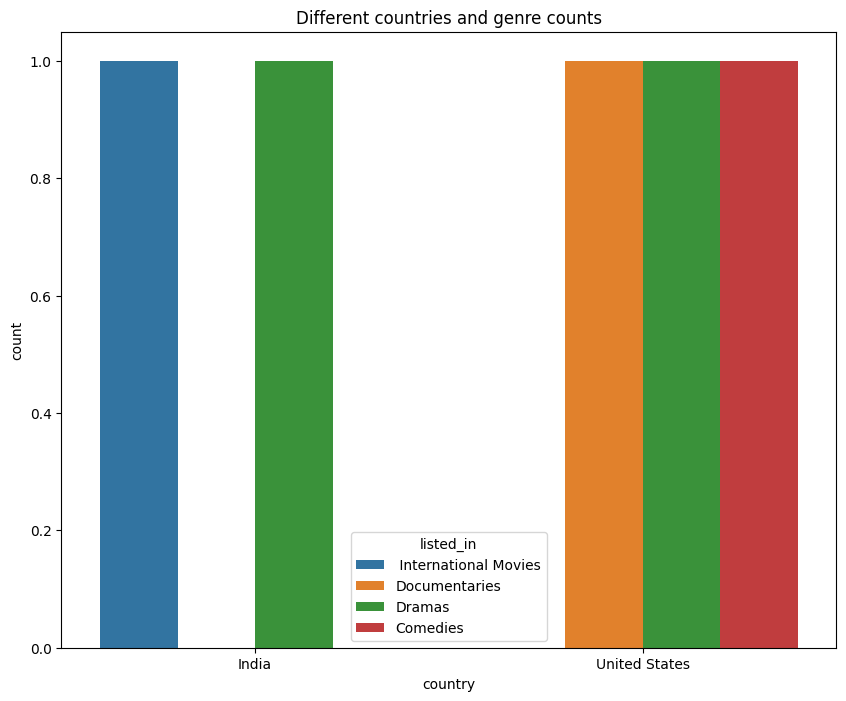

In [73]:
plt.figure(figsize=(10,8))
plt.title("Different countries and genre counts")
sns.countplot(data=movie_content,x="country",hue="listed_in")
plt.show()

# Question 5 ---->>>> insights!!!!

1. As you can infere from the table, international movies and dramas are the big genres dominating india.

2. While for USA it is slightly different case, becaues documentaries are just dominating and comedies are less prefered ones in USA.





# Question 5 ------->>>> recommendation!!!!

1. Since, indians like more drama genre type of movies, after some really few good metrics, we can surely add that in our platform, according to this data.

2. Since USA, likes lot of short movies or documentaries, netflix can add as many as possible, because that would cost less, in investing.

3. comedy and all the other type of genres are really need a deep analysis, before they get added to the platform.

4. Giving more adds on the documentaries in india and drama genres movies in USA would significantly improve these type of different genres get watched by both country people and shoots up the revenue in these both in both the countries.

